In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
import itertools as it
from collections import Counter
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
combo_samples_per_decile_save_file = "../data/combo_samples_per_decile/combo_samples_per_decile.csv"

In [4]:
vtype_bmi_df= pd.read_csv(combo_samples_per_decile_save_file)

In [5]:
decile_labels = [i[1] for i in sorted(dict(zip(vtype_bmi_df.Decile_rank, vtype_bmi_df.Decile_label)).items(), key= lambda x: x[1])]

In [6]:
sns.color_palette("Reds", 15).as_hex()

['#feeae1',
 '#fee0d2',
 '#fdcdb9',
 '#fcbba1',
 '#fca689',
 '#fc9272',
 '#fb7d5d',
 '#fb694a',
 '#f5523a',
 '#ee3a2c',
 '#dc2924',
 '#ca181d',
 '#b71319',
 '#a30f15',
 '#840711']

In [7]:
sns.color_palette("Blues", 15).as_hex()

['#eaf3fb',
 '#deebf7',
 '#d2e3f3',
 '#c6dbef',
 '#b2d2e8',
 '#9dcae1',
 '#84bcdb',
 '#6aaed6',
 '#56a0ce',
 '#4191c6',
 '#3181bd',
 '#2070b4',
 '#1460a8',
 '#08509b',
 '#084082']

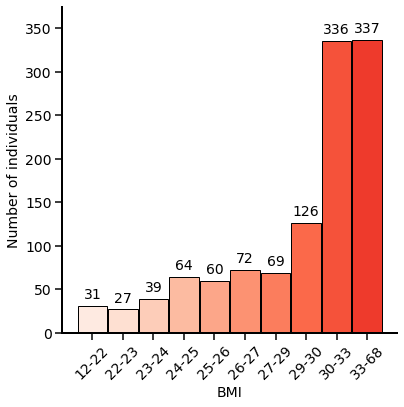

In [8]:
def create_decile_rank_plot(df, decile_labels):
    fig,ax = plt.subplots(1,1,figsize=(6, 6))
    ax.bar(df.Decile_rank, df.eid, width=0.97, color=sns.color_palette("Reds", 15).as_hex()[:10], edgecolor="k")
    xticklabels = decile_labels
    ax.set_xticks(range(10),xticklabels, rotation=45, ha="center", fontsize=14)
    ax.set_xlabel("BMI")
    ax.set_ylabel("Number of individuals")
    # g.bar_label([g.containers[i] for i in range])
    rects = ax.patches
    # Make some labels.
    for rect in rects:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, f"{height}", ha="center", va="bottom"
        )
    ax.set_ylim(0, 375)
    ax.spines[['right', 'top']].set_visible(False)
    return fig,ax

fig, ax = create_decile_rank_plot(vtype_bmi_df.groupby("Decile_rank").count().reset_index(), decile_labels)

In [9]:
save_file = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/white_british/data/combo_samples_per_decile/combo_samples_per_decile.pdf"

In [10]:
save_pdf(save_file, fig)

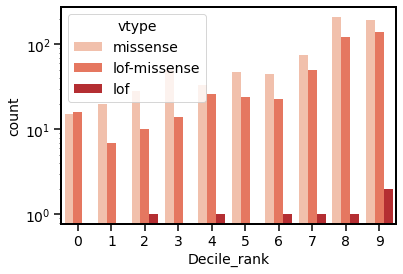

In [11]:
g = sns.countplot(data=vtype_bmi_df, x="Decile_rank", hue="vtype", palette="Reds", )
g.set_yscale("log")

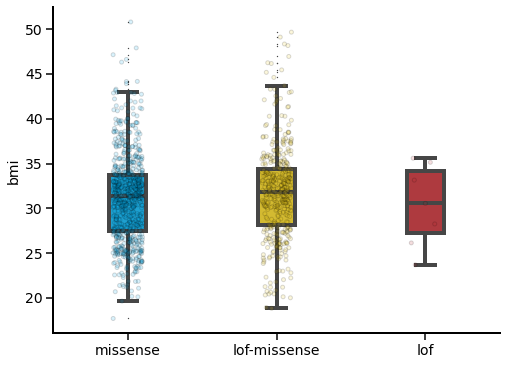

In [12]:
boxdf = vtype_bmi_df

# Define Canvas
fig,ax = plt.subplots(1, 1, figsize=(8, 6))

# Box Plot
sns_strip = sns.stripplot(
    data=boxdf,
    palette=["#00ADEE", "#eecc16", "#c1272d", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
    x="vtype",
    y="bmi",
    order=["missense", "lof-missense", "lof"],
    orient="v",
    s=4,
    alpha=0.15, ec='black', linewidth=1, jitter=True, facecolors="none", dodge=False, ax=ax 
    )

sns_box = sns.boxplot(
    data=boxdf,
    palette=["#00ADEE", "#eecc16", "#c1272d", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
    x="vtype",
    y="bmi",
    order=["missense", "lof-missense", "lof"],
    hue_order=["missense", "lof-missense", "lof"],
    dodge=False, width=0.25, linewidth=4, fliersize=0.5)


# Adjust Axis
# ax.set_yticks([-0.02, 0, 0.02, 0.04])
# ax.set_ylim((-0.025, 0.05))
# ax.set_ylabel('Percentage')
# ax.set_xticklabels(["Akbari\ngenes", "Turcot\ngenes", "Digenic\ncombinations", "Trigenic\ncombinations", ], rotation=0)
ax.set_xlabel("")

# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

In [13]:
for test_vars in list(it.combinations(vtype_bmi_df.vtype.unique(), 2)):
    bmi_g1 = vtype_bmi_df.loc[vtype_bmi_df.vtype==test_vars[0], "bmi"]
    bmi_g2 = vtype_bmi_df.loc[vtype_bmi_df.vtype==test_vars[1], "bmi"]
    print(f"Testing {test_vars[0]} vs {test_vars[1]}")
    print(ttest_ind(bmi_g1, bmi_g2))

Testing missense vs lof-missense
Ttest_indResult(statistic=-2.0402606732858475, pvalue=0.04155203247447314)
Testing missense vs lof
Ttest_indResult(statistic=0.41068712172784744, pvalue=0.6814229852633193)
Testing lof-missense vs lof
Ttest_indResult(statistic=0.7013571697486168, pvalue=0.4834534578453238)
